<a href="https://colab.research.google.com/github/OscarHdzHdz/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>**TelecomX_LATAM**</center></h1>

## Extracción

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [64]:
# cargamos los datos a Python y creamos el DataFrame datos.
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
# hacemos una revisión inicial general del DataFrame para ver su estructura y la información que contienen sus columnas
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformación

In [65]:
# obtenemos información sobre en número de filas, el tipo de datos, campos nulos, etc
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [66]:
# Este comando sirve para poder ver todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

In [67]:
# Normalizamos la columna "customer"
datos_customer = pd.json_normalize(datos['customer'])

# Agregamos 'customerID' del dataFrame original para poder combinar
datos_customer['customerID'] = datos['customerID']

# normalizamos las columnas 'phone', 'internet', y 'account'
datos_phone = pd.json_normalize(datos['phone'])
datos_internet = pd.json_normalize(datos['internet'])
datos_account = pd.json_normalize(datos['account'])

# Agregamos 'customerID' a cada DataFrame para combinar
datos_phone['customerID'] = datos['customerID']
datos_internet['customerID'] = datos['customerID']
datos_account['customerID'] = datos['customerID']

# combinamos los DataFrames normalizados
datos_customer_normalized = pd.merge(datos.drop(columns=['customer','phone', 'internet','account']), datos_customer, on='customerID', how='left')
datos_normalizado = pd.merge(datos_customer_normalized, datos_phone, on='customerID', how='left')
datos_normalizado = pd.merge(datos_normalizado, datos_internet, on='customerID', how='left')
datos_normalizado = pd.merge(datos_normalizado, datos_account, on='customerID', how='left')

datos_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [68]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [69]:
# creación de la columna costo_diario
costo_diario = datos_normalizado['Charges.Monthly'].to_numpy()
costo_diario = costo_diario/30
costo_diario

array([2.18666667, 1.99666667, 2.46333333, ..., 1.67666667, 2.26166667,
       1.96666667])

In [70]:
# Agregamos la columna al DataFrame con formato de 2 decimales
datos_normalizado['Cuentas_Diarias'] = costo_diario
datos_normalizado['Cuentas_Diarias'] = datos_normalizado['Cuentas_Diarias'].apply(lambda x: f'{x:.2f}')
datos_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [71]:
datos_normalizado['Cuentas_Diarias'] = datos_normalizado['Cuentas_Diarias'].astype(np.float64)

In [72]:
# Convertimos los datos de la columna Charges.Total a float64
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].replace(' ', np.nan)
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].astype(np.float64)
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [73]:
# detectar columnas con valores NaN
columnas_nan = datos_normalizado.columns[datos_normalizado.isna().any()].tolist()
columnas_nan

['Charges.Total']

In [74]:
for col in columnas_nan:
  nulos = datos_normalizado[col].isna().sum()
  print(f'La columna {col} tiene {nulos} nulos')

La columna Charges.Total tiene 11 nulos


In [75]:
# columnas con vacíos
columnas_vacios = datos_normalizado.columns[datos_normalizado.eq('').any()].tolist()
columnas_vacios

['Churn']

In [76]:
for col in columnas_vacios:
  vacios = datos_normalizado[col].eq('').sum()
  print(f'La columna {col} tiene {vacios} vacíos')

La columna Churn tiene 224 vacíos


In [77]:
# Eliminamos valores vacíos y NaN
datos_normalizado = datos_normalizado[datos_normalizado['Churn'] != '']

In [78]:
datos_normalizado = datos_normalizado.dropna()

In [79]:
#comprobando valores NaN
columnas_nan = datos_normalizado.columns[datos_normalizado.isna().any()].tolist()
columnas_nan

[]

In [80]:
# comprobando valores vacíos
columnas_vacios = datos_normalizado.columns[datos_normalizado.eq('').any()].tolist()
columnas_vacios

[]

In [81]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [82]:
datos_normalizado.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00


In [83]:
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Primero, estandarizamos 'No phone service' y 'No internet service' a 'No'
reemplazo_paso1 = {
    'No phone service': 'No',
    'No internet service': 'No'
}
datos_normalizado[columnas_binarias] = datos_normalizado[columnas_binarias].replace(reemplazo_paso1)

# reemplazamos 'Yes' con 1 y 'No' con 0 y convertimos a  Int64
reemplazo_paso2 = {
    'Yes': 1,
    'No': 0
}
datos_normalizado[columnas_binarias] = datos_normalizado[columnas_binarias].replace(reemplazo_paso2).astype('Int64')

datos_normalizado.head(2)

/tmp/ipython-input-496063891.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


In [84]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   Int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   Int64  
 5   Dependents        7032 non-null   Int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   Int64  
 8   MultipleLines     7032 non-null   Int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   Int64  
 11  OnlineBackup      7032 non-null   Int64  
 12  DeviceProtection  7032 non-null   Int64  
 13  TechSupport       7032 non-null   Int64  
 14  StreamingTV       7032 non-null   Int64  
 15  StreamingMovies   7032 non-null   Int64  
 16  Contract          7032 non-null   object 
 17  

## Carga y Análisis

In [85]:
# análisis descriptivo
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
descripcion_columnas_numericas = datos_normalizado[columnas_numericas].describe()
descripcion_columnas_numericas

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159913
std,24.545260,30.085974,2266.771362,1.002859
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


### Distribución de cancelaciones

In [86]:
# generamos un DataFrame que muestra la relación de cancelaciones vs retenciones
cancelaciones = pd.DataFrame(datos_normalizado['Churn'].value_counts())
cancelaciones = cancelaciones.rename(columns={'count':'Cantidad'})
porcentaje = cancelaciones['Cantidad'].to_numpy()
porcentaje = 100*porcentaje/porcentaje.sum()
cancelaciones['Porcentaje'] = porcentaje
cancelaciones['Porcentaje'] = cancelaciones['Porcentaje'].apply(lambda x: f'{x:.2f}')
cancelaciones['Porcentaje'] = cancelaciones['Porcentaje'].astype(np.float64)
cancelaciones
cancelaciones

,Cantidad,Porcentaje
Churn,,
0,5163,73.42
1,1869,26.58


In [87]:
# Cambiamos los valores de cancelación de 0 y 1 a Yes y No para mayor claridad
remplazo_cancelaciones = {1:'Yes',0:'No'}
cancelaciones.index = cancelaciones.index.map(remplazo_cancelaciones)
cancelaciones

,Cantidad,Porcentaje
Churn,,
No,5163,73.42
Yes,1869,26.58


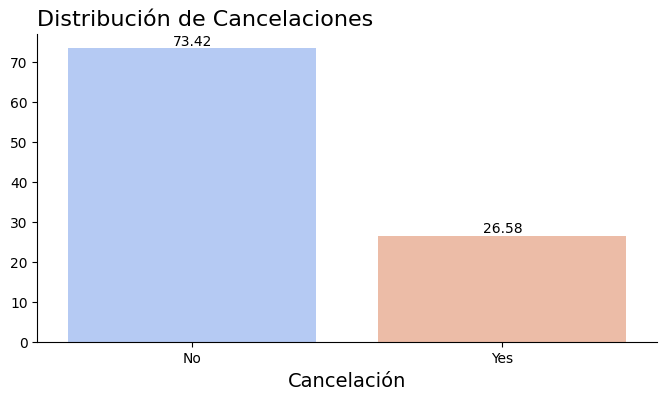

In [88]:
# Creamos un gráfico que ilustra mejor la relación de cancelaciones
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=cancelaciones, x='Churn', hue='Churn', y='Porcentaje', palette='coolwarm', legend=False)
ax.set_title('Distribución de Cancelaciones', loc='left', fontsize=16)
ax.set_xlabel('Cancelación', fontsize=14)
ax.set_ylabel('')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
plt.show()

### Distribución por género

In [89]:
# Generamos un DataFrame que muestra cuántos clientes mujeres y cuántos clientes hombres existen y su proporción
genero = pd.DataFrame(datos_normalizado['gender'].value_counts())
porcentaje_genero = genero['count'].to_numpy()
porcentaje_genero = 100*porcentaje_genero/porcentaje_genero.sum()
genero['Porcentaje'] = porcentaje_genero
genero = genero.rename(columns={'count':'Cantidad'})
genero['Porcentaje'] = genero['Porcentaje'].apply(lambda x: f'{x:.2f}')
genero['Porcentaje'] = genero['Porcentaje'].astype(np.float64)
genero

,Cantidad,Porcentaje
gender,,
Male,3549,50.47
Female,3483,49.53


<Figure size 800x800 with 0 Axes>

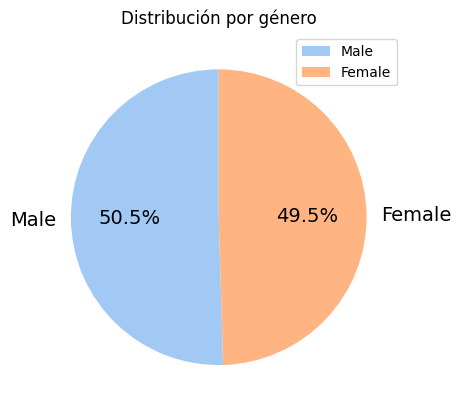

In [90]:
# Visualización que muestra la distribución por género
plt.figure(figsize=(8,8))
genero.plot(kind='pie', y='Porcentaje', autopct= '%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), textprops={'fontsize': 14})
plt.title('Distribución por género')
plt.ylabel('')
plt.show()

### Distribución de cancelaciones por género

In [91]:
# Generamos un DataFrame que muestra la relación de cancelaciones por genero
cancelaciones_genero = datos_normalizado.groupby('gender')['Churn'].value_counts().reset_index(level=1)
cancelaciones_genero

,Churn,count
gender,,
Female,0,2544
Female,1,939
Male,0,2619
Male,1,930


In [92]:
# Agregamos una columna que muestra los porcentajes de cancelación/retención por género
porcentaje = cancelaciones_genero['count'].to_numpy()
porcentaje = 100*porcentaje/porcentaje.sum()
cancelaciones_genero['Porcentaje de cancelaciones'] = porcentaje
cancelaciones_genero = cancelaciones_genero.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_genero['Porcentaje de cancelaciones'] = cancelaciones_genero['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_genero['Porcentaje de cancelaciones'] = cancelaciones_genero['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_genero

,Cancelación,Cantidad,Porcentaje de cancelaciones
gender,,,
Female,0,2544,36.18
Female,1,939,13.35
Male,0,2619,37.24
Male,1,930,13.23


In [93]:
# Mapeamos los valores de la columna 'Cancelación' a 'Yes' y 'No'
remplazo_cancelaciones_map = {0: 'No', 1: 'Yes'}
cancelaciones_genero['Cancelación'] = cancelaciones_genero['Cancelación'].map(remplazo_cancelaciones_map)

In [94]:
fig = px.histogram(cancelaciones_genero, x=cancelaciones_genero.index, y= 'Porcentaje de cancelaciones', title='Cancelación por genero', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Género', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por edad (adulto mayor o no adulto mayor)

In [95]:
# Creamos el DataFrame que ilustra las cancelaciones y retenciones por edad
cancelaciones_edad = datos_normalizado.groupby('SeniorCitizen')['Churn'].value_counts().reset_index(level=1)
cancelaciones_edad

,Churn,count
SeniorCitizen,,
0,0,4497
0,1,1393
1,0,666
1,1,476


In [96]:
# Agregamos una columna que muestra los porcentajes de cancelación
porcentaje_edad = cancelaciones_edad['count'].to_numpy()
porcentaje_edad = 100*porcentaje_edad/porcentaje_edad.sum()
cancelaciones_edad['Porcentaje de cancelaciones'] = porcentaje_edad
cancelaciones_edad = cancelaciones_edad.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_edad['Porcentaje de cancelaciones'] = cancelaciones_edad['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_edad['Porcentaje de cancelaciones'] = cancelaciones_edad['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_edad

,Cancelación,Cantidad,Porcentaje de cancelaciones
SeniorCitizen,,,
0,0,4497,63.95
0,1,1393,19.81
1,0,666,9.47
1,1,476,6.77


In [97]:
# Mapeamos los valores de la columna 'Cancelación' a 'No' y 'Yes'
remplazo_cancelaciones_edad = {0: 'No', 1: 'Yes'}
cancelaciones_edad['Cancelación'] = cancelaciones_edad['Cancelación'].map(remplazo_cancelaciones_edad)

# Mapeamos los valores del índice 'SeniorCitizen' a 'No' y 'Sí'
remplazo_senior_citizen = {0: 'No', 1: 'Sí'}
cancelaciones_edad.index = cancelaciones_edad.index.map(remplazo_senior_citizen)

In [98]:
# Creamos la gráfica
fig = px.histogram(cancelaciones_edad, x=cancelaciones_edad.index, y= 'Porcentaje de cancelaciones', title='Cancelación por edad', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Adulto Mayor', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por tipo de contrato

In [99]:
# Creamos el DataFrame que refleja la distribución por tipo de contrato
cancelaciones_contrato = datos_normalizado.groupby('Contract')['Churn'].value_counts().reset_index(level=1)
cancelaciones_contrato

,Churn,count
Contract,,
Month-to-month,0,2220
Month-to-month,1,1655
One year,0,1306
One year,1,166
Two year,0,1637
Two year,1,48


In [100]:
# Agregamos al DataFrame una columna que muestra los porcentajes de cancelación y cambiamos los nombres a las columnas
porcentaje_contrato = cancelaciones_contrato['count'].to_numpy()
porcentaje_contrato = 100*porcentaje_contrato/porcentaje_contrato.sum()
cancelaciones_contrato['Porcentaje de cancelaciones'] = porcentaje_contrato
cancelaciones_contrato = cancelaciones_contrato.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_contrato['Porcentaje de cancelaciones'] = cancelaciones_contrato['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_contrato['Porcentaje de cancelaciones'] = cancelaciones_contrato['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_contrato

,Cancelación,Cantidad,Porcentaje de cancelaciones
Contract,,,
Month-to-month,0,2220,31.57
Month-to-month,1,1655,23.54
One year,0,1306,18.57
One year,1,166,2.36
Two year,0,1637,23.28
Two year,1,48,0.68


In [101]:
# Mapeamos los valores de la columna 'Cancelación' a 'No' y 'Yes'
remplazo_cancelaciones_contrato = {0: 'No', 1: 'Yes'}
cancelaciones_contrato['Cancelación'] = cancelaciones_contrato['Cancelación'].map(remplazo_cancelaciones_contrato)

In [102]:
# Creamos la gráfica
fig = px.histogram(cancelaciones_contrato, x=cancelaciones_contrato.index, y= 'Porcentaje de cancelaciones', title='Cancelación tipo de contrato', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Contrato', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por método de pago

In [103]:
# Creamos el DataFrame que muestra la distribución de cancelaciones por método de pago
cancelaciones_metodo_pago = datos_normalizado.groupby('PaymentMethod')['Churn'].value_counts().reset_index(level=1)
cancelaciones_metodo_pago

,Churn,count
PaymentMethod,,
Bank transfer (automatic),0,1284
Bank transfer (automatic),1,258
Credit card (automatic),0,1289
Credit card (automatic),1,232
Electronic check,0,1294
Electronic check,1,1071
Mailed check,0,1296
Mailed check,1,308


In [104]:
# Agregamos al DataFrame una columna que muestra los porcentajes de cancelación y cambiamos los nombres a las columnas
porcentaje_metodo_pago = cancelaciones_metodo_pago['count'].to_numpy()
porcentaje_metodo_pago = 100*porcentaje_metodo_pago/porcentaje_metodo_pago.sum()
cancelaciones_metodo_pago['Porcentaje de cancelaciones'] = porcentaje_metodo_pago
cancelaciones_metodo_pago = cancelaciones_metodo_pago.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_metodo_pago['Porcentaje de cancelaciones'] = cancelaciones_metodo_pago['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_metodo_pago['Porcentaje de cancelaciones'] = cancelaciones_metodo_pago['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_metodo_pago

,Cancelación,Cantidad,Porcentaje de cancelaciones
PaymentMethod,,,
Bank transfer (automatic),0,1284,18.26
Bank transfer (automatic),1,258,3.67
Credit card (automatic),0,1289,18.33
Credit card (automatic),1,232,3.30
Electronic check,0,1294,18.40
Electronic check,1,1071,15.23
Mailed check,0,1296,18.43
Mailed check,1,308,4.38


In [105]:
# Mapeamos los valores de la columna 'Cancelación' a 'No' y 'Yes'
remplazo_cancelaciones_metodo = {0: 'No', 1: 'Yes'}
cancelaciones_metodo_pago['Cancelación'] = cancelaciones_metodo_pago['Cancelación'].map(remplazo_cancelaciones_metodo)

In [106]:
# Creamos la gráfica
fig = px.histogram(cancelaciones_metodo_pago, x=cancelaciones_metodo_pago.index, y= 'Porcentaje de cancelaciones', title='Cancelación por método de pago', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Método de pago', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por tipo de servicio de internet

In [107]:
datos_normalizado.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


In [108]:
# Creamos el DataFrame que muestra la distribución de cancelaciones por método de pago
cancelaciones_tipo_internet = datos_normalizado.groupby('InternetService')['Churn'].value_counts().reset_index(level=1)
cancelaciones_tipo_internet

,Churn,count
InternetService,,
DSL,0,1957
DSL,1,459
Fiber optic,0,1799
Fiber optic,1,1297
No,0,1407
No,1,113


In [109]:
# Agregamos al DataFrame una columna que muestra los porcentajes de cancelación y cambiamos los nombres a las columnas
porcentaje_tipo_internet = cancelaciones_tipo_internet['count'].to_numpy()
porcentaje_tipo_internet = 100*porcentaje_tipo_internet/porcentaje_tipo_internet.sum()
cancelaciones_tipo_internet['Porcentaje de cancelaciones'] = porcentaje_tipo_internet
cancelaciones_tipo_internet = cancelaciones_tipo_internet.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_tipo_internet['Porcentaje de cancelaciones'] = cancelaciones_tipo_internet['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_tipo_internet['Porcentaje de cancelaciones'] = cancelaciones_tipo_internet['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_tipo_internet

,Cancelación,Cantidad,Porcentaje de cancelaciones
InternetService,,,
DSL,0,1957,27.83
DSL,1,459,6.53
Fiber optic,0,1799,25.58
Fiber optic,1,1297,18.44
No,0,1407,20.01
No,1,113,1.61


In [110]:
# Mapeamos los valores de la columna 'Cancelación' a 'No' y 'Yes'
remplazo_cancelaciones_tipo = {0: 'No', 1: 'Yes'}
cancelaciones_tipo_internet['Cancelación'] = cancelaciones_tipo_internet['Cancelación'].map(remplazo_cancelaciones_tipo)

In [111]:
# Creamos la gráfica
fig = px.histogram(cancelaciones_tipo_internet, x=cancelaciones_tipo_internet.index, y= 'Porcentaje de cancelaciones', title='Cancelación por Tipo de Internet', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Tipo de internet', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por tipo de facturación

In [112]:
datos_normalizado.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


In [113]:
# Creamos el DataFrame ajustando los valores del índice para mejor comprension
cancelaciones_facturacion = datos_normalizado.groupby('PaperlessBilling')['Churn'].value_counts().reset_index(level=1)
cancelaciones_facturacion.index = cancelaciones_facturacion.index.map({
    0: 'Física',
    1: 'Electrónica'})
cancelaciones_facturacion

,Churn,count
PaperlessBilling,,
Física,0,2395
Física,1,469
Electrónica,0,2768
Electrónica,1,1400


In [114]:
# Agregamos al DataFrame una columna que muestra los porcentajes de cancelación y cambiamos los nombres a las columnas
porcentaje_facturacion = cancelaciones_facturacion['count'].to_numpy()
porcentaje_facturacion = 100*porcentaje_facturacion/porcentaje_facturacion.sum()
cancelaciones_facturacion['Porcentaje de cancelaciones'] = porcentaje_facturacion
cancelaciones_facturacion = cancelaciones_facturacion.rename(columns={'Churn':'Cancelación','count':'Cantidad'})
cancelaciones_facturacion['Porcentaje de cancelaciones'] = cancelaciones_facturacion['Porcentaje de cancelaciones'].apply(lambda x: f'{x:.2f}')
cancelaciones_facturacion['Porcentaje de cancelaciones'] = cancelaciones_facturacion['Porcentaje de cancelaciones'].astype(np.float64)
cancelaciones_facturacion

,Cancelación,Cantidad,Porcentaje de cancelaciones
PaperlessBilling,,,
Física,0,2395,34.06
Física,1,469,6.67
Electrónica,0,2768,39.36
Electrónica,1,1400,19.91


In [115]:
# Mapeamos los valores de la columna 'Cancelación' a 'No' y 'Yes'
remplazo_cancelaciones_facturacion = {0: 'No', 1: 'Yes'}
cancelaciones_facturacion['Cancelación'] = cancelaciones_facturacion['Cancelación'].map(remplazo_cancelaciones_facturacion)

In [116]:
# Creamos la gráfica
fig = px.histogram(cancelaciones_facturacion, x=cancelaciones_facturacion.index, y= 'Porcentaje de cancelaciones', title='Cancelación por tipo de facturación', color='Cancelación', barmode='group')
fig.update_layout(xaxis_title='Tipo de facturación', yaxis_title='Porcentaje de Cancelaciones',bargap=0.1, width=800, height=500)
fig.show()

### Distribución de cancelaciones por costo mensual

In [117]:
# Creamos un DataFrame que muestra las cancelaciones con el total gastado
cancelaciones_costo_mensual = datos_normalizado.set_index('Churn')['Charges.Monthly'].to_frame()
cancelaciones_costo_mensual.index.rename('Cancelación', inplace=True)
cancelaciones_costo_mensual = cancelaciones_costo_mensual.rename(columns={'Charges.Monthly':'Cargos Mensuales'})
cancelaciones_costo_mensual

,Cargos Mensuales
Cancelación,
0,65.60
0,59.90
1,73.90
1,98.00
1,83.90
...,...
0,55.15
1,85.10
0,50.30


In [118]:
# Mapeamos los valores del índice 'Cancelación' a 'No' y 'Sí'
remplazo_costo_mensual = {0: 'No', 1: 'Sí'}
cancelaciones_costo_mensual.index = cancelaciones_costo_mensual.index.map(remplazo_costo_mensual)

In [119]:
# Se calculan los datos estadísticos del boxplot
boxplot_stats = {}
for churn_status in ['No', 'Sí']:
    subset = cancelaciones_costo_mensual[cancelaciones_costo_mensual.index == churn_status]['Cargos Mensuales']
    boxplot_stats[f'{churn_status}_median'] = subset.median()
    boxplot_stats[f'{churn_status}_Q1'] = subset.quantile(0.25)
    boxplot_stats[f'{churn_status}_Q3'] = subset.quantile(0.75)

print("Calculated Boxplot Statistics:")
for key, value in boxplot_stats.items():
    print(f"{key}: {value:.2f}")

Calculated Boxplot Statistics:
No_median: 64.45
No_Q1: 25.10
No_Q3: 88.47
Sí_median: 79.65
Sí_Q1: 56.15
Sí_Q3: 94.20


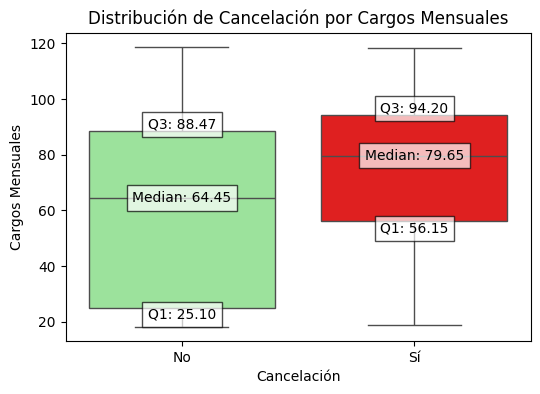

In [120]:
# Creamos el gráfico boxplot incluyendo los datos estadísticos calculados
plt.figure(figsize=(6,4))
sns.boxplot(data=cancelaciones_costo_mensual, x='Cancelación', y='Cargos Mensuales', hue='Cancelación', palette={'No': 'lightgreen', 'Sí': 'red'}, showfliers=False, legend=False)

# Anotamos los datos para la gráfica 'No'
plt.text(x=0, y=boxplot_stats['No_median'], s=f"Median: {boxplot_stats['No_median']:.2f}", ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=0, y=boxplot_stats['No_Q1'], s=f"Q1: {boxplot_stats['No_Q1']:.2f}", ha='center', va='top', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=0, y=boxplot_stats['No_Q3'], s=f"Q3: {boxplot_stats['No_Q3']:.2f}", ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.7))

# Anotamos los datos para la gráfica 'Sí'
plt.text(x=1, y=boxplot_stats['Sí_median'], s=f"Median: {boxplot_stats['Sí_median']:.2f}", ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=1, y=boxplot_stats['Sí_Q1'], s=f"Q1: {boxplot_stats['Sí_Q1']:.2f}", ha='center', va='top', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=1, y=boxplot_stats['Sí_Q3'], s=f"Q3: {boxplot_stats['Sí_Q3']:.2f}", ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.title('Distribución de Cancelación por Cargos Mensuales')
plt.xlabel('Cancelación')
plt.ylabel('Cargos Mensuales')
plt.show()

### Distribución de cancelaciones por tiempo de contrato

In [121]:
# Creamos un DataFrame que muestra las cancelaciones con el tiempo de contrato
cancelaciones_tiempo = datos_normalizado.set_index('Churn')['tenure'].to_frame()
cancelaciones_tiempo.index.rename('Cancelación', inplace=True)
cancelaciones_tiempo

,tenure
Cancelación,
0,9
0,9
1,4
1,13
1,3
...,...
0,13
1,22
0,2


In [122]:
# Mapeamos los valores del índice 'Cancelación' a 'No' y 'Sí'
remplazo_tiempo = {0: 'No', 1: 'Sí'}
cancelaciones_tiempo.index = cancelaciones_tiempo.index.map(remplazo_tiempo)

In [123]:
# Se calculan los datos estadísticos del boxplot
boxplot_stats1 = {}
for churn_status in ['No', 'Sí']:
    subset = cancelaciones_tiempo[cancelaciones_tiempo.index == churn_status]['tenure']
    boxplot_stats1[f'{churn_status}_median'] = subset.median()
    boxplot_stats1[f'{churn_status}_Q1'] = subset.quantile(0.25)
    boxplot_stats1[f'{churn_status}_Q3'] = subset.quantile(0.75)

print("Calculated Boxplot Statistics:")
for key, value in boxplot_stats1.items():
    print(f"{key}: {value:.2f}")

Calculated Boxplot Statistics:
No_median: 38.00
No_Q1: 15.00
No_Q3: 61.00
Sí_median: 10.00
Sí_Q1: 2.00
Sí_Q3: 29.00


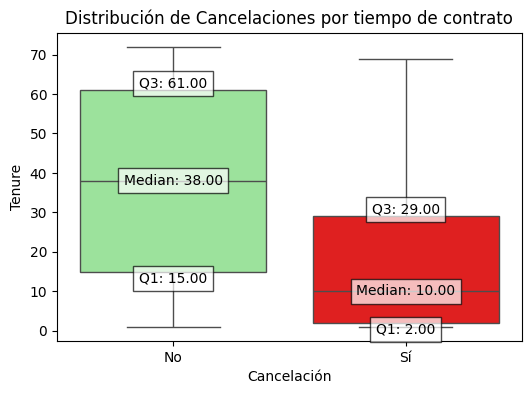

In [124]:
# Creamos el gráfico boxplot incluyendo los datos estadísticos calculados
plt.figure(figsize=(6,4))
sns.boxplot(data=cancelaciones_tiempo, x='Cancelación', y='tenure', hue='Cancelación', palette={'No': 'lightgreen', 'Sí': 'red'}, showfliers=False, legend=False)

# Anotamos los datos para la gráfica 'No'
plt.text(x=0, y=boxplot_stats1['No_median'], s=f"Median: {boxplot_stats1['No_median']:.2f}", ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=0, y=boxplot_stats1['No_Q1'], s=f"Q1: {boxplot_stats1['No_Q1']:.2f}", ha='center', va='top', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=0, y=boxplot_stats1['No_Q3'], s=f"Q3: {boxplot_stats1['No_Q3']:.2f}", ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.7))

# Anotamos los datos para la gráfica 'Sí'
plt.text(x=1, y=boxplot_stats1['Sí_median'], s=f"Median: {boxplot_stats1['Sí_median']:.2f}", ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=1, y=boxplot_stats1['Sí_Q1'], s=f"Q1: {boxplot_stats1['Sí_Q1']:.2f}", ha='center', va='top', color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.text(x=1, y=boxplot_stats1['Sí_Q3'], s=f"Q3: {boxplot_stats1['Sí_Q3']:.2f}", ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.title('Distribución de Cancelaciones por tiempo de contrato')
plt.xlabel('Cancelación')
plt.ylabel('Tenure')
plt.show()

## Informe Final

### 1. Introducción

El objetivo de este análisis es comprender los factores que llevan a los clientes de Telecom X a cancelar sus servicios y poder proporcionar sugerencias estratégicas que permitan:


*   Reducir el número de cancelaciones
*   Dirigir esfuerzos a segmentos con mayor riesgo de cancelación
*   Proporcionar información que permita generar modelos de IA que puedan      predecir efectivamente posibles clientes en riesgo de cancelación

### 2. Limpieza y Tratamiento de Datos



*   Se cargó un archivo JSON desde la URL proporcionada
*   Dado que algunas columnas del archivo contenían diccionarios, se hizo la normalización de dichas columnas
*   Se agregó la columna costo_diario con el formato adecuado
*   Se eliminaron valores NaN y vacíos y se cambió el tipo de dato de object a Int o float de las columnas que así lo requerían.
*   Se cambiaron valores "Sí" y "No" a "1" y "0" de algunas columnas del DataFrame









### 3. Análisis Exploratorio de Datos (EDA)



*   Distribución de cancelaciones: de 7032 clientes totales, 1869 cancelaron sus servicios lo que representa un porcentaje del 26.58%
*   Distribución de cancelaciones por edad: Aquellos que NO son adultos mayores, tuvieron un porcentaje de cancelación más elevado (19.81%) vs los adultos mayores (6.77%), lo cuál indica que las personas más jóvenes son más propensos a cancelar.
*   Distribución de cancelación por plazo de contrato: Los clientes con contratos mes a mes tienen el índice de cancelación más alto con el 23.54%. Los contratos de uno y dos años, prácticamente aseguran la permanencia del cliente en la compañía.
*   Distribución de cancelaciones por método de pago: También destaca un alto número de cancelaciones en clientes que pagan con cheque electrónico (15.23%), lo cuál puede indicar complejidad en el proceso de pago.
*   Distribución de cancelaciones por tipo de internet: Hay una tendencia de mayor cancelación entre los clientes que tienen contratado el servicio de internet de fibra optica con un porcentaje de cancelación del 18.44% lo cuál puede ser un indicador de una mala calidad en el servicio.
*   Cancelaciones por tipo de facturación: La facturación electrónica tiene el número mayor de cancelaciones de este grupo con el 19.91%, lo cuál puede indicar una distribución deficiente de las facturas del cliente o una recolección deficiente de la información requerida para la facturación electrónica.
*   Cancelaciones por costo mensual: En análisis realizado indica que los costos mensuales más elevados tienen un impácto negativo en el número de cancelaciones.
*   Cancelaciones por tiempo de contrato: En análisis nos muestra que el mayor número de cancelaciones se da en los primeros meses de servicio.









### 4. Conclusiones e Insights

Los factores que más influyen en la cancelación son los siguientes:


1.   El plazo del contrato: Los contratos a corto plazo evitan el fortalecimiento de la relación con los clientes y abren la puerta a la cancelación temprana del servicio. Esto es consistente con el tiempo de los contratos (tenure) de los clientes ya que podemos ver que las cancelaciones se dan en los primeros meses.
2.   Costo mensual elevado: Los clientes muestran un rechazo a los costos mensuales altos lo que combinado con posibles complicaciones al realizar el pago del servicio, pricipalmente para clientes que pagan con cheque electrónico, eleva la tasa de cancelación
3.   Calidad en el Servicio y en la atención al cliente: Los clientes que tienen el servicio de fibra óptica son los que más cancelan lo que puede ser un indicador de un área de oportunidad en cuanto a la calidad del servicio y el soporte que se brinda a los clientes. Esto va de la mano con el alto número de cancelaciones para clientes con facturación electrónica y los que pagan con cheque electrónico, lo que también deja ver áreas de oportunidad en la comunicación oportuna con el cliente, la sencillez que ofrece la compañía para realizar los pagos de las facturas.






### 5. Recomendaciones estratégicas



*   Migración a contratos de uno o 2 años: Ofrecer mayores beneficios para clientes que contraten los servicios por al menos un año y de igual forma ofrecer incentivos a aquellos clientes que cambien su contrato mensual a un contrato por uno o dos años. Estos beneficios pueden ser descuentos, precios preferenciales, mejoras en el tipo de servicio, etc
*   Incentivar los pagos automáticos: Buscar que los clientes activen los cargos automáticos a su cuenta de cheques o tarjeta de crédito/débito. Puede ser ofreciendo un descuento fijo mensual por ejemplo: $5.00 usd menos cada mes si activa la domiciliación de su factura.
*   Mejora en la calidad de servicios y atención a cliente: Asegurar que los servicios de fibra óptica que ofrece la compañía funcionan a la perfección y que son confiables. Mejorar las plataformas de interacción con los clientes para que los procesos de pago sean amigables con los clientes y para asegurar la alta calidad de la información recabada por la empresa para los métodos de facturación.
*   Desarrollo de modelos predictivos: Con la información proporcionada y contenida dentro de este análisis, se pueden desarrollar modelos de IA que permitan detectar clientes que puedan estar en riesgo de cancelación, las causas de este riesgo y puedan ofrecer posibles soluciones basadas en las ofertas actuales de la empresa y evitar proactivamente que el cliente cancele sus servicios.

Al implementar estas recomendaciones, la empresa ofrece mejores precios con mayores beneficios lo cuál ataca directamente al problema de la sensibilidad de los clientes a precios elevados. De igual forma facilita al cliente el manejo y pago de sus facturas buscando que los clientes que pagan con cheque electrónico migren a pagos automáticos reduciendo el número de cancelaciones por método de pago. Por último, al mejorar los servicios y plataformas de interacción con el cliente, aseguramos la satisfacción del mismo, lo que refuerza la voluntad de los clientes a aceptar contratos más largos y aumenta su confianza en la compañia.





In [125]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
